In this homework, we will use the __Laptops price dataset__ from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).



In [1]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

The goal of this homework is to create a regression model for predicting the prices (column <code>'Final Price'</code>).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

__Preparing the dataset__

First, we'll normalize the names of the columns:

In [3]:
df_new = pd.read_csv('laptops.csv')
df_new.columns = df_new.columns.str.lower().str.replace(' ', '_')
df = df_new.copy()

Next, use only the following columns:

<code>'ram'</code>,
<code>'storage'</code>,
<code>'screen'</code>,
<code>'final_price'</code>

In [4]:
df = df[['ram','storage','screen', 'final_price']]

## EDA

Look at the final_price variable. Does it have a _long tail_?

Text(0.5, 0, 'Final Price')

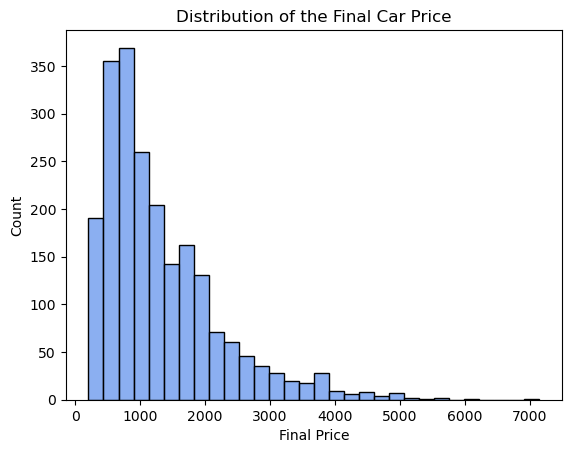

In [5]:
ax = sns.histplot(data = df, x = 'final_price', color = 'cornflowerblue', bins = 30)
ax.set_title('Distribution of the Final Car Price')
ax.set_xlabel('Final Price')

The distribution appears to be __long-tailed__, so we need to apply a __logarithmic transformation__ to the car prices in order to approximate a normal distribution.

__Q1__
There's one column with missing values. What is it?

In [6]:
df.isnull().sum()


ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [7]:
screen = 'screen'
print(f"\033[1m{screen}\033[0m column includes null values.")


screen column includes null values.


__Q2__ What's the median (50% percentile) for variable <code> ram </code>?

In [8]:
median_ram = df['ram'].median()
print(f"The median for the 'ram' variable is \033[1m{median_ram}\033[0m.")

The median for the 'ram' variable is 16.0.


- Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [9]:
np.random.seed(42)
n = len(df)
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n -n_val-n_test
#lets check the size
n, n_train+n_val+n_test

(2160, 2160)

In [10]:
idx = np.arange(n)

np.random.shuffle(idx)


df_train = df.iloc[idx[:n_train]]

df_val = df.iloc[idx[n_train:n_train+n_val]]

df_test = df.iloc[idx[n_train+n_val:]]

print(len(df_train), len(df_val), len(df_test), len(df_train)+len(df_val)+len(df_val))

#y_train = np.log1p(df_train.final_price.values)
#y_val =  np.log1p(df_val.final_price.values)
#y_test = np.log1p(df_test.final_price.values)

y_train = df_train.final_price.values
y_val =  df_val.final_price.values
y_test = df_test.final_price.values


del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

1296 432 432 2160


__Question 3__

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [11]:
mean_train = df_train.mean()

#df_train_v1 = df_train.fillna(0)
#df_val_v1 = df_val.fillna(0)
#df_test_v1 = df_test.fillna(0)

#df_train_v2 = df_train.fillna(mean_train)
#df_val_v2 = df_val.fillna(mean_train)
#df_test_v2 = df_test.fillna(mean_train)

def train_linear_regression(x,y):


In [12]:
def prepare_data_zero(df):
    df =df.copy()
    df = df.fillna(0)
    return df.values
    
def prepare_data_mean(df):
    df =df.copy()
    df = df.fillna(mean_train)
    return df.values
        

In [13]:
def train_linear_regression(X,y):
    #for the bias component
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

Let's proceed with training the dataset where NaN values have been __filled with zero__.

In [14]:
#X_train1 = df_train_v1.values
#X_val1 = df_val_v1.values
X_train1 = prepare_data_zero(df_train)
X_val1 = prepare_data_zero(df_val)
w0, w = train_linear_regression(X_train1,y_train)
print(w0)
print(w)

676.8954853003471
[ 43.70681555   0.86506867 -36.10399833]


In [15]:
y_val_pred1 = w0 + X_val1.dot(w)
#print(y_val_pred )
#print(y_val)
def rmse (y_actual, y_pred):
    n= len(y_actual)
    err_sq = (y_pred - y_actual)**2
    mean_err = np.mean(err_sq)
    return np.sqrt(mean_err)
y_val_remse1 = rmse(y_val_pred1, y_val)
print(f"After filling the NaN values with 0, the root mean square error \033[1m(RMSE)\033[0m for the validation set was \033[1m{y_val_remse1:.2f}\033[0m.")

After filling the NaN values with 0, the root mean square error (RMSE) for the validation set was 597.36.


Let's repeat the steps for the dataset where we filled the NaN values __with the training mean__.

In [16]:
X_train2 = prepare_data_mean(df_train)
X_val2 = prepare_data_mean(df_val)
w0_new, w_new = train_linear_regression(X_train2,y_train)
print(w0)
print(w)
print(mean_train)

676.8954853003471
[ 43.70681555   0.86506867 -36.10399833]
ram         15.666667
storage    599.101852
screen      15.163534
dtype: float64


In [17]:
y_val_pred2 = w0_new + X_val2.dot(w_new)
y_val_remse2 = rmse(y_val_pred2, y_val)
print(y_val_remse2)
print(f"After filling the NaN values with mean values, the root mean square error \033[1m(RMSE)\033[0m for the validation set was \033[1m{y_val_remse2:.2f}\033[0m.")

600.2650313748422
After filling the NaN values with mean values, the root mean square error (RMSE) for the validation set was 600.27.


__Filling with zero__ gave better RMSE.

__Q4__ Now let's train a regularized linear regression.
 
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

In [18]:
def train_linear_regression_reg(X,y, reg):
    #for the bias component
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    #add regularization term to diagonal components
    XTX = XTX + reg*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [19]:
np.random.seed(42)
X_trainnew = prepare_data_zero(df_train)
X_valnew = prepare_data_zero(df_val)
for i in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0r, wr = train_linear_regression_reg(X_trainnew,y_train, reg = i)
    y_val_pred1 = w0r + X_valnew.dot(wr)
    score = rmse(y_val_pred1,y_val)
    print(f"regularization parameter: {i}, bias term: {w0}, score: {score:.2f}")
    

regularization parameter: 0, bias term: 676.8954853003471, score: 597.36
regularization parameter: 0.01, bias term: 676.8954853003471, score: 597.36
regularization parameter: 0.1, bias term: 676.8954853003471, score: 597.35
regularization parameter: 1, bias term: 676.8954853003471, score: 597.21
regularization parameter: 5, bias term: 676.8954853003471, score: 597.01
regularization parameter: 10, bias term: 676.8954853003471, score: 597.06
regularization parameter: 100, bias term: 676.8954853003471, score: 597.90


We evaluated the __smallest__ RMSE score for the regularization parameters __r = 5__.



__q5__ We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

In [20]:
results = []
for seed in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    idx = np.arange(n)
    
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]

    df_val = df.iloc[idx[n_train:n_train+n_val]]

    df_test = df.iloc[idx[n_train+n_val:]]

    print(len(df_train), len(df_val), len(df_test), len(df_train)+len(df_val)+len(df_val))

    #y_train = np.log1p(df_train.final_price.values)
    #y_val =  np.log1p(df_val.final_price.values)
    #y_test = np.log1p(df_test.final_price.values)
    y_train = df_train.final_price.values
    y_val =  df_val.final_price.values
    y_test = df_test.final_price.values
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    #df_train_v1 = df_train.fillna(0)
    #df_val_v1 = df_val.fillna(0)
    #df_test_v1 = df_test.fillna(0)
    #X_train1 = df_train_v1.values
    #X_val1 = df_val_v1.values
    #X_test = df_test_v1.values
    
    X_train =  prepare_data_zero(df_train)
    X_val =  prepare_data_zero(df_val)
    X_test =  prepare_data_zero(df_test)
    w0, w = train_linear_regression(X_train,y_train)
    y_val_pred1 = w0 + X_val.dot(w)
    score = rmse(y_val_pred1,y_val)
    results.append(score)

arr_results = np.hstack(results)   
print(arr_results)

print()

1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
1296 432 432 2160
[565.45208688 636.79854231 588.95586979 597.814892   571.96279151
 573.23832566 647.34383284 550.43981845 587.33350362 576.10179294]



In [21]:
print(f"The standard deviation of the RMSE scores across different random seeds is \033[1m{np.std(arr_results):.3f}\033[0m")

The standard deviation of the RMSE scores across different random seeds is 29.176


__q6__ 

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [22]:
np.random.seed(9)
idx = np.arange(n)

np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
print(len(df_train), len(df_val), len(df_test), len(df_train)+len(df_val)+len(df_val))
#y_train = np.log1p(df_train.final_price.values)
#y_val =  np.log1p(df_val.final_price.values)
#y_test = np.log1p(df_test.final_price.values)

y_train = df_train.final_price.values
y_val =  df_val.final_price.values
y_test = df_test.final_price.values
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)
y_full_train = np.concatenate([y_train,y_val])
df_full_train = df_full_train.fillna(0)
df_test_v1 = df_test.fillna(0)
X_full_train = df_full_train.values
X_test1 = df_test_v1.values
w0, w = train_linear_regression_reg(X_full_train,y_full_train, 0.001)
y_test_pred1 = w0 + X_test1.dot(w)
score = rmse(y_test_pred1,y_test)
print(f'The RMSE for the test data is \033[1m{score:.2f}\033[0m.')

1296 432 432 2160
The RMSE for the test data is 608.61.
